<a href="https://colab.research.google.com/github/rohithreddy999/Machine_learning-AI-predictions/blob/main/GOLD_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
from prophet import Prophet

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv('gold_data.csv')

In [4]:
df

,Date,Price,Open,High,Low,Volume
0,29/09/2015,1127.100,1132.400,1133.600,1123.900,0.250
1,30/09/2015,1115.500,1127.500,1127.500,1111.300,0.280
2,01/10/2015,1114.000,1114.900,1118.300,1111.000,0.260
3,02/10/2015,1136.700,1113.000,1140.700,1105.000,0.470
4,05/10/2015,1137.700,1138.700,1141.300,1129.800,0.200
...,...,...,...,...,...,...
1799,18/07/2022,1710.200,1706.400,1722.000,1704.400,0.000
1800,19/07/2022,1710.700,1707.200,1716.500,1702.600,0.000
1801,20/07/2022,1700.200,1709.500,1712.700,1690.100,0.000
1802,21/07/2022,1713.400,1693.700,1719.500,1678.400,0.000


In [5]:
df.isnull().sum()


Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df = df[['Date','Open']]
df

,Date,Open
0,29/09/2015,1132.400
1,30/09/2015,1127.500
2,01/10/2015,1114.900
3,02/10/2015,1113.000
4,05/10/2015,1138.700
...,...,...
1799,18/07/2022,1706.400
1800,19/07/2022,1707.200
1801,20/07/2022,1709.500
1802,21/07/2022,1693.700


In [8]:
df.columns = ['ds','y']
df

,ds,y
0,29/09/2015,1132.400
1,30/09/2015,1127.500
2,01/10/2015,1114.900
3,02/10/2015,1113.000
4,05/10/2015,1138.700
...,...,...
1799,18/07/2022,1706.400
1800,19/07/2022,1707.200
1801,20/07/2022,1709.500
1802,21/07/2022,1693.700


In [9]:
model = Prophet(daily_seasonality=True)

In [10]:
model.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_0dn_0og/e2gd_uhk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_0dn_0og/pmhv38e9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59902', 'data', 'file=/tmp/tmp_0dn_0og/e2gd_uhk.json', 'init=/tmp/tmp_0dn_0og/pmhv38e9.json', 'output', 'file=/tmp/tmp_0dn_0og/prophet_model0h8h3ihf/prophet_model-20230705155634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:56:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:56:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [12]:
df.tail()

,ds,y
1799,18/07/2022,1706.400
1800,19/07/2022,1707.200
1801,20/07/2022,1709.500
1802,21/07/2022,1693.700
1803,22/07/2022,1717.200


In [13]:
future_dates = model.make_future_dataframe(periods=1000,freq='D')
future_dates.tail()

,ds
2799,2025-08-29
2800,2025-08-30
2801,2025-08-31
2802,2025-09-01
2803,2025-09-02


In [14]:
prediction = model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-10,1096.116,953.814,1139.962,1096.116,1096.116,-50.353,-50.353,-50.353,-65.741,...,-3.011,-3.011,-3.011,18.399,18.399,18.399,0.000,0.000,0.000,1045.763
1,2015-01-12,1096.957,959.031,1138.076,1096.957,1096.957,-49.721,-49.721,-49.721,-65.741,...,0.067,0.067,0.067,15.953,15.953,15.953,0.000,0.000,0.000,1047.236
2,2015-02-10,1109.157,979.558,1157.796,1109.157,1109.157,-41.122,-41.122,-41.122,-65.741,...,-1.158,-1.158,-1.158,25.776,25.776,25.776,0.000,0.000,0.000,1068.035
3,2015-02-11,1109.578,970.812,1163.032,1109.578,1109.578,-40.556,-40.556,-40.556,-65.741,...,-2.635,-2.635,-2.635,27.820,27.820,27.820,0.000,0.000,0.000,1069.022
4,2015-02-12,1109.999,978.296,1171.794,1109.999,1109.999,-31.808,-31.808,-31.808,-65.741,...,4.326,4.326,4.326,29.607,29.607,29.607,0.000,0.000,0.000,1078.191


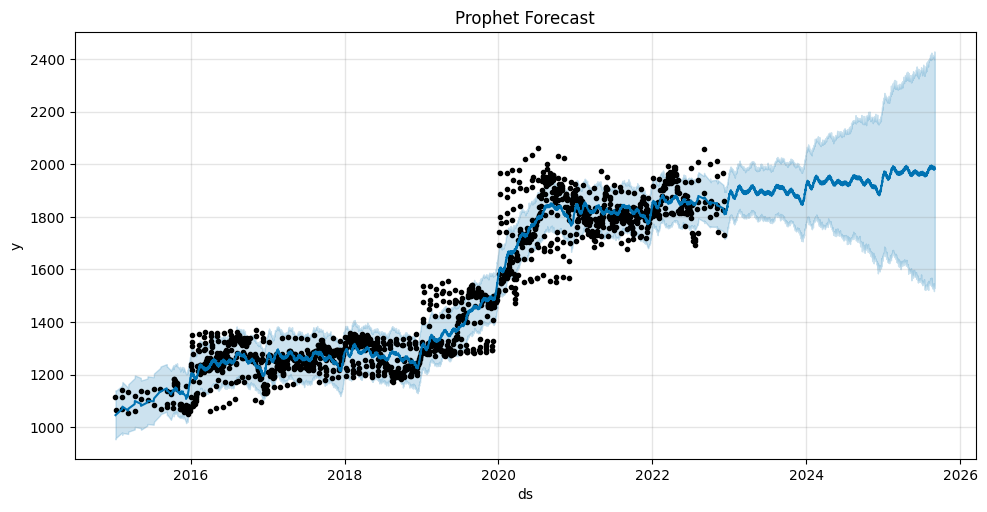

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(prediction,ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

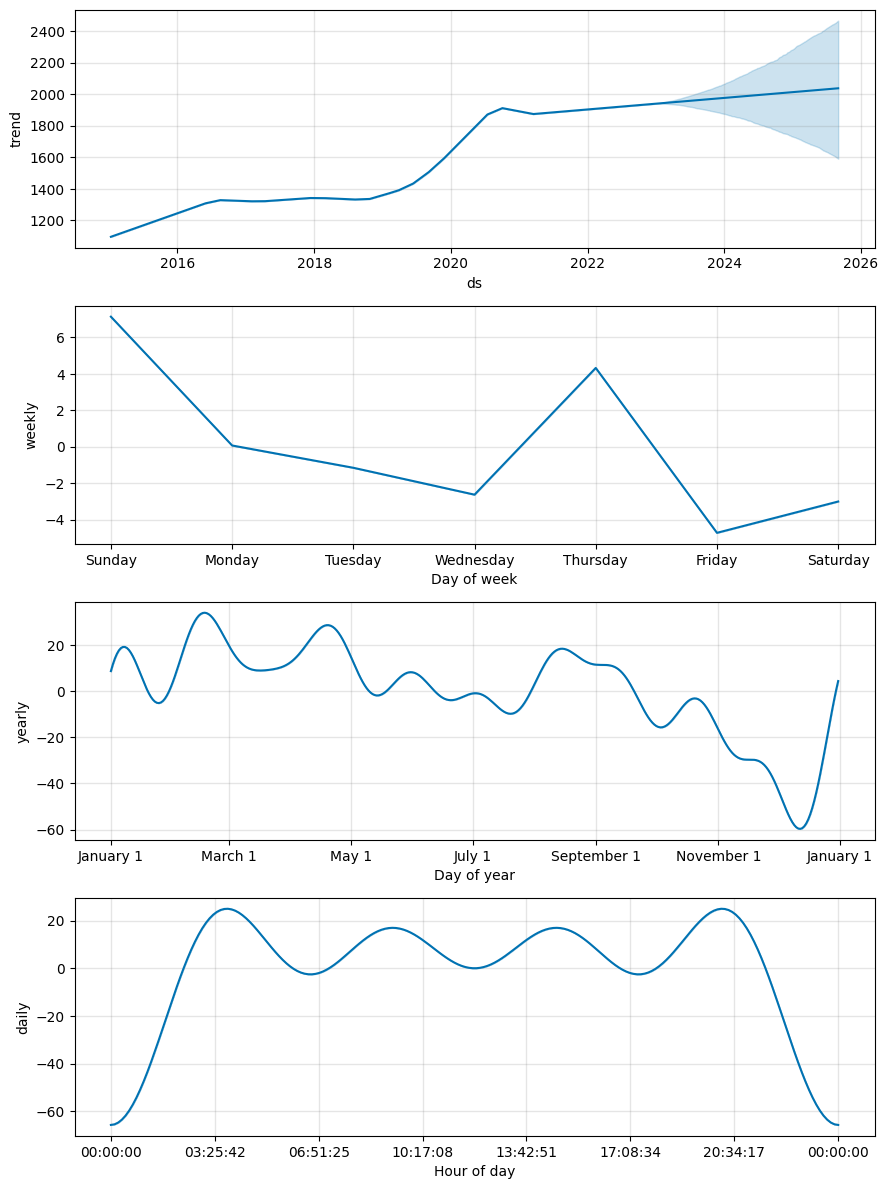

In [16]:
fig2 = model.plot_components(prediction)
plt.show()

In [17]:
print('The Price of gold is:')
print(prediction[prediction.ds == '05/07/2023	']['yhat'])

The Price of gold is:
1954   1898.790
Name: yhat, dtype: float64
